In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Dataset\supermarket_sales - Sheet1.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1001 non-null   float64
 6   Quantity                 1000 non-null   float64
 7   Review Quantity          1001 non-null   object 
 8   Check                    0 non-null      float64
 9   Tax 5%                   1000 non-null   object 
 10   Total                   1001 non-null   object 
 11  Date                     1000 non-null   object 
 12  Time                     1000 non-null   object 
 13  Payment                  1000 non-null   object 
 14  cogs                    

In [4]:
# Invoice id: Computer generated sales slip invoice identification number

# Branch: Branch of supercenter 
# (3 branches are available identified by A, B and C).

# City: Location of supercenters

# Customer type: Type of customers, recorded 
# by Members for customers using member card 
# and Normal for without member card.

# Gender: Gender type of customer

# Product line: General item categorization groups 
# — Electronic accessories, Fashion accessories, 
# Food and beverages, Health and beauty, Home 
# and lifestyle, Sports and travel

# Unit price: Price of each product in $

# Quantity: Number of products purchased by customer

# Tax: 5% tax fee for customer buying

# Total: Total price including tax

# Date: Date of purchase (Record available from January 2019 to March 2019)

# Time: Purchase time (10am to 9pm)

# Payment: Payment used by customer for purchase 
# (3 methods are available — Cash, Credit card and Ewallet)

# COGS: Cost of goods sold

# Gross margin percentage: Gross margin percentage

# Gross income: Gross income

# Rating: Customer stratification rating on their 
# overall shopping experience (On a scale of 1 to 10

In [5]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Product line',
       'Unit price', 'Quantity', 'Review Quantity', 'Check', 'Tax 5%',
       ' Total ', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage',
       'gross income', 'Rating'],
      dtype='object')

In [6]:
cat=[]
num=[]
for column in df.columns:
    if df[column].nunique() > 10:
        num.append(column)
    else:
        cat.append(column)

Univariate Analysis
### 1. Find Aggregate Sales Among Branches (Categorical Column)


In [7]:
df['Branch'].unique()

array(['R1C1', 'C', 'A', 'B', nan], dtype=object)

In [8]:
df = df.dropna(subset=['Branch'])

In [9]:
df = df[df['Branch'] != 'R1C1']

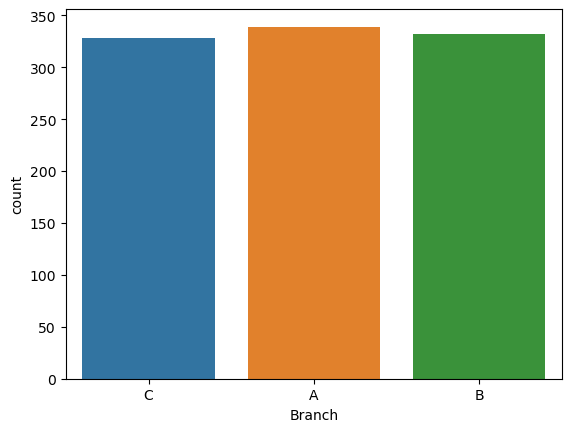

In [10]:
sns.countplot(data=df, x = 'Branch')
cleaned_df = df[df['Branch'] != 'R1C1']
df.drop(df[df['Branch'] == 'R1C1'].index, inplace=True)

<Axes: xlabel='Branch', ylabel='count'>

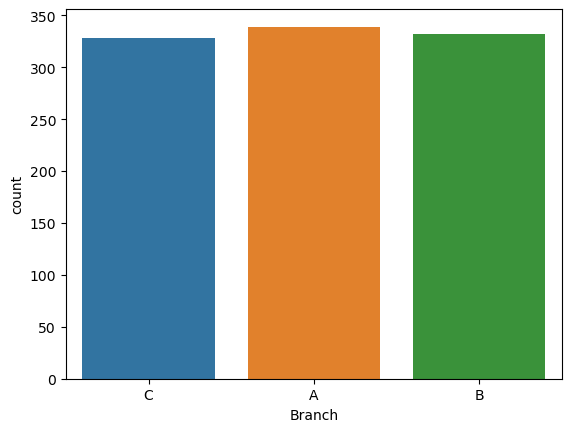

In [11]:
sns.countplot(data=df, x='Branch')

In [12]:
df['Branch'].value_counts()

Branch
A    339
B    332
C    328
Name: count, dtype: int64

In [13]:
cleaned_df=df[df['Branch']!='R1C1']

In [14]:
df.drop(df[df['Branch'] =='R1C1'].index,inplace=True)

In [15]:
cleaned_df['Branch'].value_counts()

Branch
A    339
B    332
C    328
Name: count, dtype: int64

### 2. Find the most popular payment method used by customer(Categorical Column)

In [16]:
payment_counts = df['Payment'].value_counts()

In [17]:
payment_counts

Payment
Cash           344
Ewallet        344
Credit card    311
Name: count, dtype: int64

<Axes: xlabel='Payment', ylabel='count'>

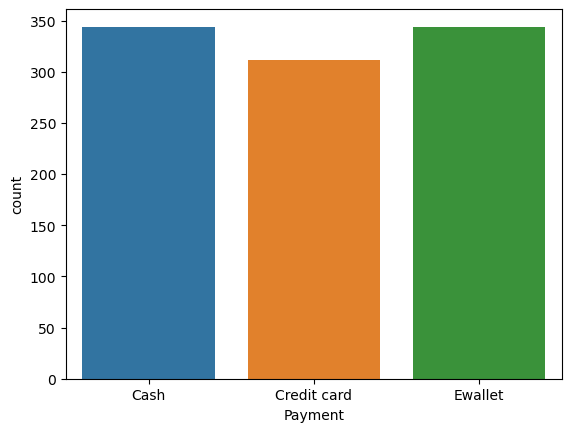

In [18]:
sns.countplot(data=df, x='Payment')

### 3. Find the distribution of customers ratings.(Numerical Column)

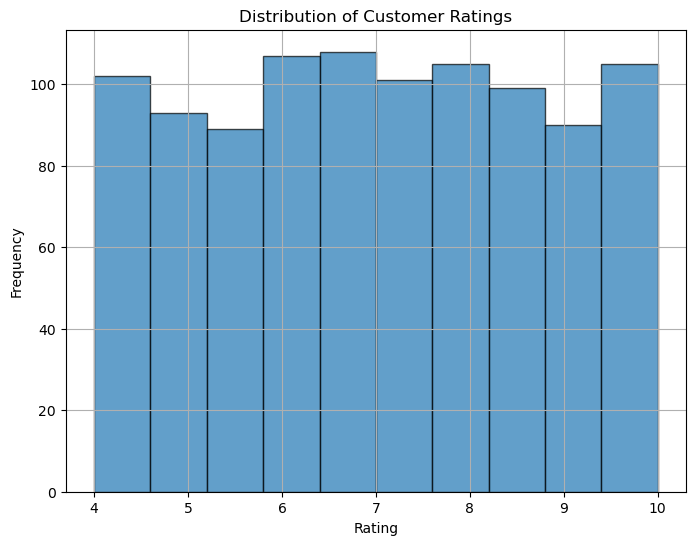

In [19]:
plt.figure(figsize=(8, 6))
plt.hist(df['Rating'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Find the distribution of cost of Goods sold. (Numerical Column)

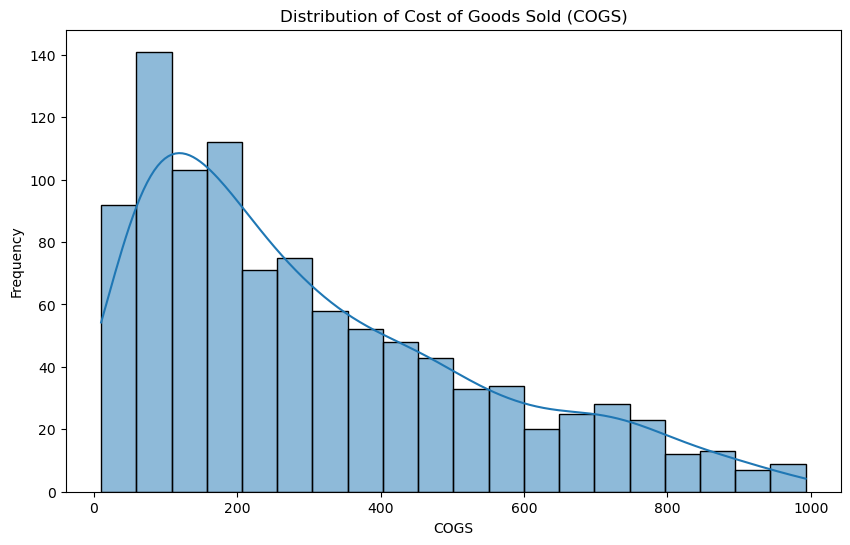

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['cogs'], bins=20, kde=True)
plt.title('Distribution of Cost of Goods Sold (COGS)')
plt.xlabel('COGS')
plt.ylabel('Frequency')
plt.show()

## Bivariate Analysis/Multivariate Analysis

### 1.Does the cost of goods sold affect gthe ratings the customer provide? (Numerical-Numerical)

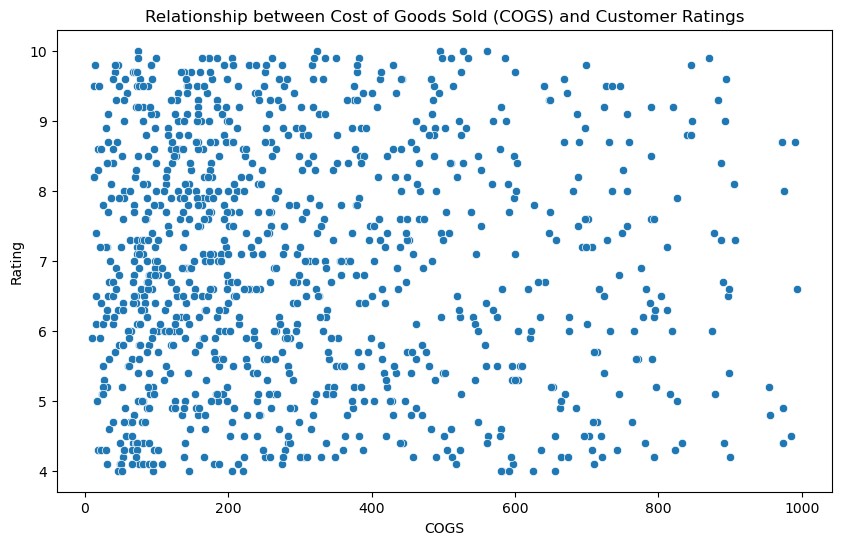

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='cogs', y='Rating')
plt.title('Relationship between Cost of Goods Sold (COGS) and Customer Ratings')
plt.xlabel('COGS')
plt.ylabel('Rating')
plt.show()


### Does gross income affect the ratings that the customer provide?(Numerical-Numerical)

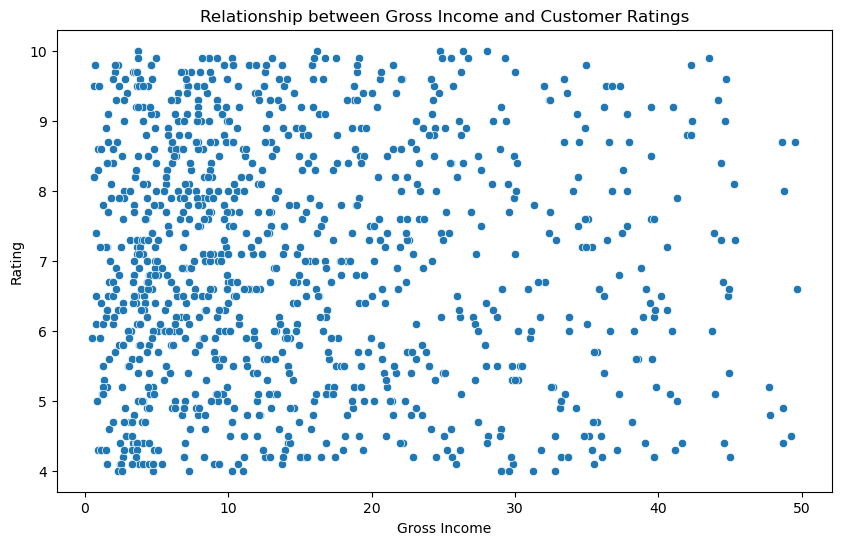

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='gross income', y='Rating')
plt.title('Relationship between Gross Income and Customer Ratings')
plt.xlabel('Gross Income')
plt.ylabel('Rating')
plt.show()

### 3. Find the most profitable branch as per gross income (NUMERICAL- CATEGORICAL)

In [23]:
branch_gross_income = df.groupby('Branch')['gross income'].sum().reset_index()

In [24]:
branch_gross_income

,Branch,gross income
0,A,5031.0190
1,B,5057.0320
2,C,5265.1765


In [25]:
most_profitable_branch = branch_gross_income.loc[branch_gross_income['gross income'].idxmax()]

In [26]:
print(branch_gross_income)
print(f"The most profitable branch is {most_profitable_branch['Branch']} with a total gross income of {most_profitable_branch['gross income']:.2f}")

  Branch  gross income
0      A     5031.0190
1      B     5057.0320
2      C     5265.1765
The most profitable branch is C with a total gross income of 5265.18


In [27]:
df.isnull().sum()

Invoice ID                   0
Branch                       0
City                         0
Customer type                0
Product line                 0
Unit price                   0
Quantity                     0
Review Quantity              0
Check                      999
Tax 5%                       0
 Total                       0
Date                         0
Time                         0
Payment                      0
cogs                         0
gross margin percentage      2
gross income                 0
Rating                       0
dtype: int64

### 5. Find the product line that generates the most income.(Numerical-Categorical)

In [28]:
product_line_income = df.groupby('Product line')['gross income'].sum().reset_index()

In [29]:
product_line_income

,Product line,gross income
0,Electronic \naccessories,3.8200
1,Electronic accessories,2583.6815
2,Fashion accessories,2585.9950
3,Food and beverages,2673.5640
4,Health and beauty,2316.4175
5,Home and lifestyle,2564.8530
6,Sports and travel,2624.8965


In [30]:
most_profitable_product_line = product_line_income.loc[product_line_income['gross income'].idxmax()]

In [31]:
most_profitable_product_line

Product line    Food and beverages
gross income              2673.564
Name: 3, dtype: object

In [32]:
print(product_line_income)
print(f"The product line that generates the most income is {most_profitable_product_line['Product line']} with a total gross income of {most_profitable_product_line['gross income']:.2f}")

               Product line  gross income
0  Electronic \naccessories        3.8200
1    Electronic accessories     2583.6815
2       Fashion accessories     2585.9950
3        Food and beverages     2673.5640
4         Health and beauty     2316.4175
5        Home and lifestyle     2564.8530
6         Sports and travel     2624.8965
The product line that generates the most income is Food and beverages with a total gross income of 2673.56


### 6. Find the highest unit price in the product line. (Numerical-Categorical)

In [33]:
highest_unit_price = df.groupby('Product line')['Unit price'].max().reset_index()

In [34]:
highest_unit_price

,Product line,Unit price
0,Electronic \naccessories,15.28
1,Electronic accessories,99.73
2,Fashion accessories,99.89
3,Food and beverages,99.79
4,Health and beauty,99.96
5,Home and lifestyle,99.92
6,Sports and travel,99.96


In [35]:
print(highest_unit_price)

               Product line  Unit price
0  Electronic \naccessories       15.28
1    Electronic accessories       99.73
2       Fashion accessories       99.89
3        Food and beverages       99.79
4         Health and beauty       99.96
5        Home and lifestyle       99.92
6         Sports and travel       99.96


### 7. Find different payment method used by customers citywise.(Categorical-Categorical)

In [36]:
city_payment_methods = df.groupby(['City', 'Payment']).size().reset_index(name='Count')

In [37]:
print(city_payment_methods)

        City      Payment  Count
0   Mandalay         Cash    110
1   Mandalay  Credit card    109
2   Mandalay      Ewallet    113
3  Naypyitaw         Cash    124
4  Naypyitaw  Credit card     98
5  Naypyitaw      Ewallet    106
6     Yangon         Cash    110
7     Yangon  Credit card    104
8     Yangon      Ewallet    125


### 8. Which product line is purchased in the highest quantity?

In [38]:
highest_quantity_product_line = product_line_quantity.loc[product_line_quantity['Quantity'].idxmax()]

NameError: name 'product_line_quantity' is not defined